In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from load_data import *

In [15]:
# P(Coupling)
# P(Coupling/Volcano)

im_paleo = [im_dandak, im_jhumar, im_cook,  im_sinha_2015, im_shi_2018, im_shi_2017, im_shi_2014, \
           im_sano_2017, im_borgaonkar_2010, im_yadava_2004]

im_paleo_yy = [yy_dandak, yy_jhumar, yy_cook, yy_sinha_2015, yy_shi_2018, yy_shi_2017, yy_shi_2014, \
              yy_sano_2017, yy_borgaonkar_2010, yy_yadava_2004]

im_paleo_volc = [volc_dandak, volc_jhumar, volc_cook,  volc_sinha_2015, volc_shi_2018, volc_shi_2017, \
                volc_shi_2014, volc_sano_2017, volc_borgaonkar_2010, volc_yadava_2004]
im_event_series = [False, False, False, False, False, False, False, False, False, False]

nino3_paleo = [nino3_li_2011, nino3_li_2013, nino3_mann_2009, nino3_moy_2002, nino3_arrigo_2005, \
              nino3_mcgregor_2010, nino3_stahle_1998, nino3_emily_geay_2012, nino3_cook_2008, \
              nino3_gergis_2009, nino3_yan_2011, nino3_datwyler_2019, nino3_wilson_2010, \
              nino3_braganza_2009]

nino3_paleo_yy = [yy_li_2011, yy_li_2013, yy_mann_2009, yy_moy_2002, yy_arrigo_2005, yy_mcgregor_2010, \
                 yy_stahle_1998, yy_emily_geay_2012, yy_cook_2008, yy_gergis_2009, yy_yan_2011, yy_datwyler_2019, \
                 yy_wilson_2010, yy_braganza_2009]

nino3_paleo_volc = [volc_li_2011, volc_li_2013, volc_mann_2009, volc_moy_2002, volc_arrigo_2005, \
                   volc_mcgregor_2010, volc_stahle_1998, volc_emily_geay_2012, volc_cook_2008, \
                   volc_gergis_2009, volc_yan_2011, volc_datwyler_2019, volc_wilson_2010, \
                   volc_braganza_2009]

nino3_event_series = [False, False, False, False, False, False, False, False, False, True, False, False, False, False]

print(im_paleo[0].shape[0])
print(im_dandak.shape[0])
#print(yy_mcgregor_2010)
dvolc = np.genfromtxt('sigl_volc.txt', delimiter=",")
dvolc_yy = dvolc[:,0]
dvolc_mag = dvolc[:,1]

937
937


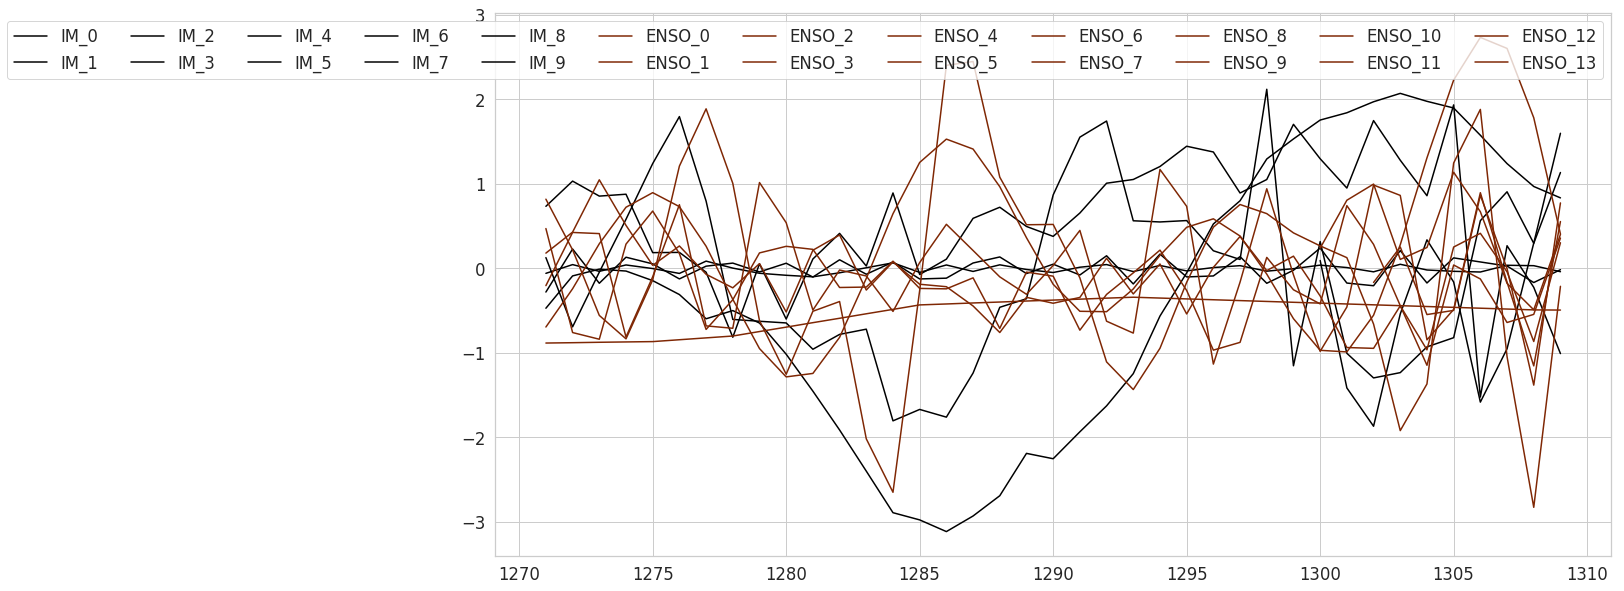

In [16]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('Greys')
N = 10
for i in range(len(im_paleo)):
    idx = np.logical_and(im_paleo_yy[i]>1270,im_paleo_yy[i]<1310)
    dummy_yy = im_paleo_yy[i][idx]
    dummy = im_paleo[i][idx]
    color = cmap(float(i)+10)
    plt.plot(dummy_yy, dummy, label="IM_"+str(i), c=color)
cmap = plt.get_cmap('Oranges')
for j in range(len(nino3_paleo)):
    idx = np.logical_and(nino3_paleo_yy[j]>1270,nino3_paleo_yy[j]<1310)
    dummy_yy = nino3_paleo_yy[j][idx]
    dummy = nino3_paleo[j][idx]
    color = cmap(float(j)+10)
    plt.plot(dummy_yy, dummy,label="ENSO_"+str(j), c=color)
plt.legend(ncol=12)

In [53]:
def find_nearest(array, value):
    #idx = np.where(array == value)
    idx = (np.abs(array - value)).argmin()
    #print(idx)
    return idx
win_yy_start = 1410
win_yy_end = 1500
corr=[]
im_example = []
nino3_example = []
from scipy.stats import pearsonr
for im_i in range(len(im_paleo)):
    for nino3_j in range(len(nino3_paleo)):
        #if (nino3_paleo_yy[nino3_j][0] < im_paleo_yy[im_i][-1]) and (im_paleo_yy[im_i][0] < nino3_paleo_yy[nino3_j][-1]):
        if (nino3_paleo_yy[nino3_j][0] < im_paleo_yy[im_i][-1]) and (im_paleo_yy[im_i][0] < nino3_paleo_yy[nino3_j][-1]):
            #if ((nino3_paleo_yy[nino3_j][0] < 1000) and (im_paleo_yy[im_i][0] < 1000) and (nino3_paleo_yy[nino3_j][-1] > 900) and (im_paleo_yy[im_i][-1] < 900)):
            
            yy_start = max(im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            yy_end = min(im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            #yy_start = 900
            #yy_end  = 1000
            

            #print(yy_start, im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            #print(yy_end, im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            j=0
            if yy_start>=win_yy_end or yy_end<=win_yy_start:
                continue
            #print(yy_start, im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            #print(yy_end, im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            
            im_idx_start = find_nearest(im_paleo_yy[im_i], win_yy_start)
            im_idx_end = find_nearest(im_paleo_yy[im_i], win_yy_end)
            nino3_idx_start = find_nearest(nino3_paleo_yy[nino3_j], win_yy_start)
            nino3_idx_end = find_nearest(nino3_paleo_yy[nino3_j], win_yy_end)
            
            yy_start_ex = max(im_paleo_yy[im_i][im_idx_start], nino3_paleo_yy[nino3_j][nino3_idx_start])
            yy_end_ex = min(im_paleo_yy[im_i][im_idx_end], nino3_paleo_yy[nino3_j][nino3_idx_end])
            
            im_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            nino3_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            volc_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            yy_dummy = np.arange(int(yy_start_ex),int(yy_end_ex)+1)

            #print(nino3_paleo_yy[nino3_j])
            #print(yy_start_ex, yy_end_ex)
            #print(nino3_idx_start)
            #print(nino3_paleo_yy[nino3_j][nino3_idx_start])
            #print(im_paleo_yy[im_i][im_idx_start])
            #print(im_paleo_yy[im_i][im_idx_end])
            #print(nino3_paleo_yy[nino3_j][nino3_idx_start])
            #print(nino3_paleo_yy[nino3_j][nino3_idx_end])
            
            #print(im_i, nino3_j)
            for i in range(int(yy_start_ex),int(yy_end_ex)+1):
                #print(im_i)
                im_idx = np.where(im_paleo_yy[im_i] == i)[0][0]
                im_dummy[j] = im_paleo[im_i][im_idx]
                volc_dummy[j] = im_paleo_volc[im_i][im_idx]
    
                nino3_idx = np.where(nino3_paleo_yy[nino3_j] == i)[0][0]
            #print(nino3_idx)
                nino3_dummy[j] = nino3_paleo[nino3_j][nino3_idx]
                j = j + 1
            #print(np.corrcoef(im_dummy, nino3_dummy)[0,1])
            print(pearsonr(im_dummy, nino3_dummy))
            corr.append([pearsonr(im_dummy, nino3_dummy)])
            im_example.append(im_dummy)
            nino3_example.append(nino3_dummy)

(0.02778354161826328, 0.7937650093370978)
(-0.010199599401934028, 0.9235559768725992)
(-0.052095958199536885, 0.6238317440020734)
(0.0033526889393494775, 0.9748384353631376)
(-0.08755424573115644, 0.4092269391105787)
(-0.008841635943317539, 0.9337088250686377)
(-0.14101750576651026, 0.18243387907792538)
(0.4480015278171105, 8.470235208335708e-06)
(0.31763734935122323, 0.0021546064634936734)
(0.07431671371012197, 0.48386171519653554)
(0.033588041850421115, 0.7519498348807078)
(0.06992448668071868, 0.5101379441511872)
(-0.04229138162162302, 0.6906042308161076)
(0.021011456776941988, 0.8432895550334519)
(-0.061265073736811344, 0.5640105403469753)
(0.050336391931442986, 0.6356131424839768)
(0.052117362186202776, 0.6236890036234719)
(-0.26777126575977483, 0.010284724588268727)
(0.1581530374062164, 0.13432344446633485)
(-0.20727197549881946, 0.048680400516909465)
(0.03569521202322841, 0.7369383413602949)
(0.11420121575922733, 0.281086735776542)
(-0.15544028211083966, 0.141219104201825)
(-0.0

In [54]:
corr = np.asarray(corr)

In [55]:
dummy=[]
for i in range(corr.shape[0]):
    if corr[i,0,1]>0.05:
        continue
    dummy.append(corr[i,0,0])

In [56]:
print(np.percentile(dummy,50))
print(np.mean(dummy))

-0.20727197549881946
-0.03052783856668727


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std

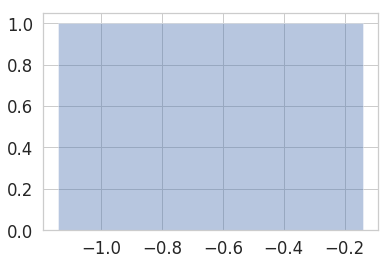

In [52]:
import seaborn as sns
sns.distplot(dummy)

In [22]:
def check_ele_present(li, arr):
    for i in range(len(li)):
        if (li[i]==arr).all():
            return True
    return False

im_example_new = []
for li in im_example:
        if not check_ele_present(im_example_new, li):
            im_example_new.append(li)

nino3_example_new = []
for li in nino3_example:
        if not check_ele_present(nino3_example_new, li):
            nino3_example_new.append(li)


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'bool' object has no attribute 'all'

NameError: name 'nino3_example_new' is not defined

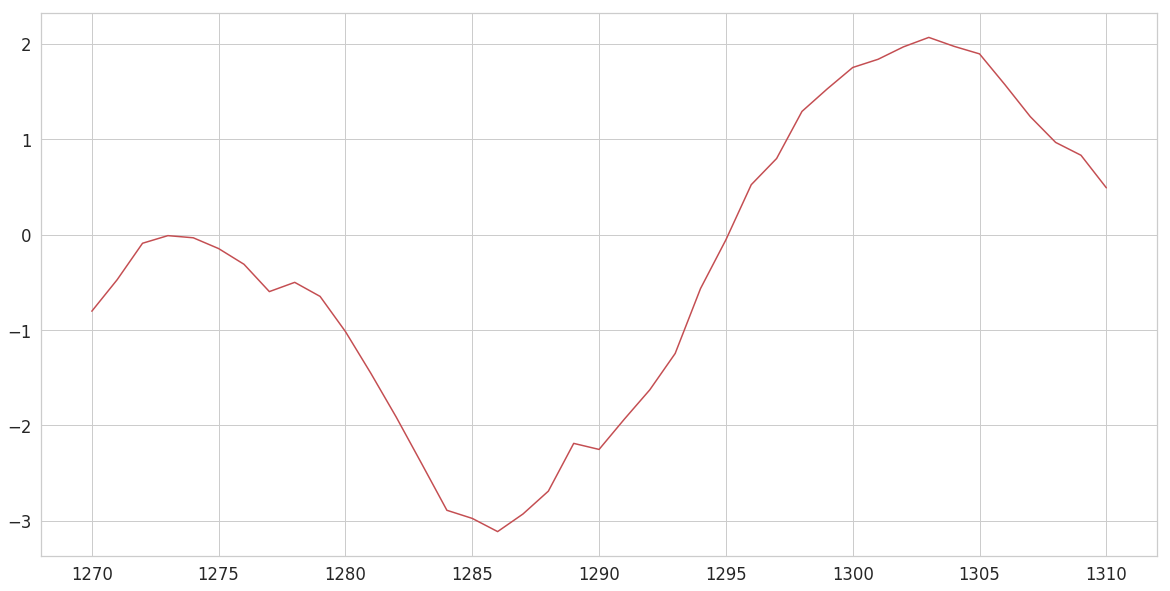

In [11]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(20,10))
plt.plot(yy_dummy, im_example_new[0], color='r', label='IM_paleo')
for i in range(1,len(im_example_new)):
    plt.plot(yy_dummy, im_example_new[i], color='r')
plt.plot(yy_dummy, nino3_example_new[0], color='y', label='ENSO_paleo')
for i in range(1,len(nino3_example_new)):
    plt.plot(yy_dummy, nino3_example_new[i], color='y')
plt.grid()
plt.legend()
plt.xlabel('Years (in AD)')
plt.ylabel('Normalized Index')
plt.text(970, 2, 'Mean Corr Coef = -0.59 at 95% sig', fontsize=20)